# EDA
## Vivienda en Madrid

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

In [90]:
data = pd.read_csv('houses_Madrid.csv', index_col='Unnamed: 0')
data = data.sort_index(axis= 1)

Eliminación de las columnas que son nulas o no aportan información relevante al análisis

In [91]:
data.columns

Index(['are_pets_allowed', 'built_year', 'buy_price', 'buy_price_by_area',
       'door', 'energy_certificate', 'floor', 'has_ac', 'has_balcony',
       'has_central_heating', 'has_fitted_wardrobes', 'has_garden',
       'has_green_zones', 'has_individual_heating', 'has_lift', 'has_parking',
       'has_pool', 'has_private_parking', 'has_public_parking',
       'has_storage_room', 'has_terrace', 'house_type_id', 'id',
       'is_accessible', 'is_buy_price_known', 'is_exact_address_hidden',
       'is_exterior', 'is_floor_under', 'is_furnished', 'is_kitchen_equipped',
       'is_new_development', 'is_orientation_east', 'is_orientation_north',
       'is_orientation_south', 'is_orientation_west',
       'is_parking_included_in_price', 'is_renewal_needed',
       'is_rent_price_known', 'latitude', 'longitude', 'n_bathrooms',
       'n_floors', 'n_rooms', 'neighborhood_id', 'operation', 'parking_price',
       'portal', 'raw_address', 'rent_price', 'rent_price_by_area',
       'sq_mt_allot

In [92]:
def nombre_columnas(df):
    '''Función para tratar el nombre de las columnas y eliminar las vacias'''
    try:
        df.drop(columns=['latitude', 'longitude', 'portal', 'door', 'rent_price_by_area', 'are_pets_allowed', 'is_furnished',
                    'is_kitchen_equipped', 'has_private_parking', 'has_public_parking', 'sq_mt_useful', 'n_floors', 'has_ac', 'title',
                    'sq_mt_allotment', 'raw_address', 'is_exact_address_hidden', 'street_name', 'street_number', 'is_buy_price_known',
                    'is_parking_included_in_price', 'is_rent_price_known', 'operation', 'is_new_development', 'parking_price', 'rent_price', 'id', 'neighborhood_id',
                    'has_central_heating', 'has_individual_heating', 'has_lift', 'is_orientation_east', 'is_orientation_north', 'is_orientation_south', 'is_orientation_west'
                    ], axis=1, inplace = True)
        
        df.columns = ['annio_construccion', 'precio_compra', 'precio_compra_por_m2', 'cee',
       'piso', 'balcon', 'armarios_empotrados', 'jardin', 'zonas_verdes', 
       'estacionamiento', 'pileta',
       'trastero', 'terraza', 'tipo_inmueble',
       'accesible', 'exterior', 'bajo', 'necesita_reforma', 'bannos', 'habitaciones',
        'metros_cuadrados', 'ubicacion']

    except Exception as a:
        print(f"No pude tranformar las columnas por {a}")
    return df

In [93]:
df = nombre_columnas(data)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annio_construccion    10000 non-null  float64
 1   precio_compra         21742 non-null  int64  
 2   precio_compra_por_m2  21742 non-null  int64  
 3   cee                   21742 non-null  object 
 4   piso                  19135 non-null  object 
 5   balcon                3321 non-null   object 
 6   armarios_empotrados   13399 non-null  object 
 7   jardin                1556 non-null   object 
 8   zonas_verdes          4057 non-null   object 
 9   estacionamiento       21742 non-null  bool   
 10  pileta                5171 non-null   object 
 11  trastero              7698 non-null   object 
 12  terraza               9548 non-null   object 
 13  tipo_inmueble         21351 non-null  object 
 14  accesible             4074 non-null   object 
 15  exterior              18

In [95]:
df.describe(include = 'all').round()

,annio_construccion,precio_compra,precio_compra_por_m2,cee,piso,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,metros_cuadrados,ubicacion
count,10000.0,21742.0,21742.0,21742,19135,3321,13399,1556,4057,21742,5171,7698,9548,21351,4074,18699,20572,21742,21726.0,21742.0,21616.0,21742
unique,NaN,NaN,NaN,10,19,1,1,1,1,2,1,1,1,4,1,2,2,2,NaN,NaN,NaN,146
top,NaN,NaN,NaN,en trámite,1,True,True,True,True,False,True,True,True,HouseType 1: Pisos,True,True,False,False,NaN,NaN,NaN,"Chamartín, Madrid"
freq,NaN,NaN,NaN,10937,4440,3321,13399,1556,4057,14023,5171,7698,9548,17705,4074,16922,18033,17747,NaN,NaN,NaN,851
mean,1970.0,653736.0,4021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,147.0,NaN
std,69.0,782082.0,1908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,134.0,NaN
min,1723.0,36000.0,447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,13.0,NaN
25%,1957.0,198000.0,2551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,70.0,NaN
50%,1970.0,375000.0,3720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,100.0,NaN
75%,1994.0,763600.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,162.0,NaN


In [96]:
df_cardin = pd.DataFrame([{
    'variable' : i,
    'tipo_dato' : df[i].dtypes,
    'cantidad_de_nulos' : df[i].isna().sum(),
    'valores_unicos' : df[i].unique(),
    'cardinalidad' : df[i].nunique(),
    'porcentaje_cardinalidad' : (df[i].nunique()/df.shape[0])*100
} for i in df])

In [97]:
df_tipo_variable = pd.DataFrame({'tipo_variable' : ['discreta', 'continua', 'continua', 'ordinal',
       'ordinal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'discreta',
       'discreta', 'continua', 'nominal']})

In [98]:
df_cardinalidad = pd.concat([df_cardin,df_tipo_variable], axis = 1)

In [99]:
df_cardinalidad

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad,tipo_variable
0,annio_construccion,float64,11742,"[1960.0, nan, 1955.0, 2003.0, 1981.0, 1950.0, ...",155,0.712906,discreta
1,precio_compra,int64,0,"[85000, 129900, 144247, 109900, 260000, 195000...",2403,11.052341,continua
2,precio_compra_por_m2,int64,0,"[1328, 1856, 1535, 1717, 2407, 1548, 1583, 158...",5643,25.954374,continua
3,cee,object,0,"[D, en trámite, no indicado, F, E, inmueble ex...",10,0.045994,ordinal
4,piso,object,2607,"[3, 4, 1, Bajo, 2, nan, 7, 6, Semi-sótano, 5, ...",19,0.087388,ordinal
5,balcon,object,18421,"[nan, True]",1,0.004599,nominal
6,armarios_empotrados,object,8343,"[nan, True]",1,0.004599,nominal
7,jardin,object,20186,"[nan, True]",1,0.004599,nominal
8,zonas_verdes,object,17685,"[nan, True]",1,0.004599,nominal
9,estacionamiento,bool,0,"[False, True]",2,0.009199,nominal


## Analisis Univariante

In [100]:
# COLORES
color_g = '#E67E22'
media_color = 'r'
mediana_color = 'b'

##### Variables Cuantitativas

In [101]:
df_cuant = df.select_dtypes(include = 'number')
df_cuant.describe().round()

,annio_construccion,precio_compra,precio_compra_por_m2,bannos,habitaciones,metros_cuadrados
count,10000.0,21742.0,21742.0,21726.0,21742.0,21616.0
mean,1970.0,653736.0,4021.0,2.0,3.0,147.0
std,69.0,782082.0,1908.0,1.0,2.0,134.0
min,1723.0,36000.0,447.0,1.0,0.0,13.0
25%,1957.0,198000.0,2551.0,1.0,2.0,70.0
50%,1970.0,375000.0,3720.0,2.0,3.0,100.0
75%,1994.0,763600.0,5000.0,2.0,4.0,162.0
max,8170.0,8800000.0,18889.0,16.0,24.0,999.0


In [102]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h', palette='husl')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, palette='husl' , bins = 30)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

------------------------------------------------------------
VARIABLE: annio_construccion



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


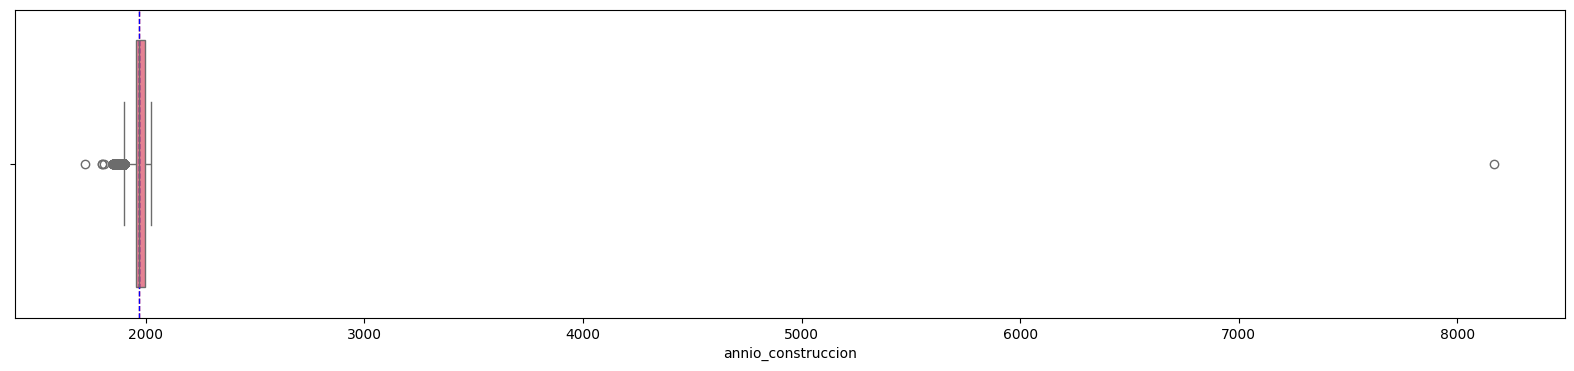

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


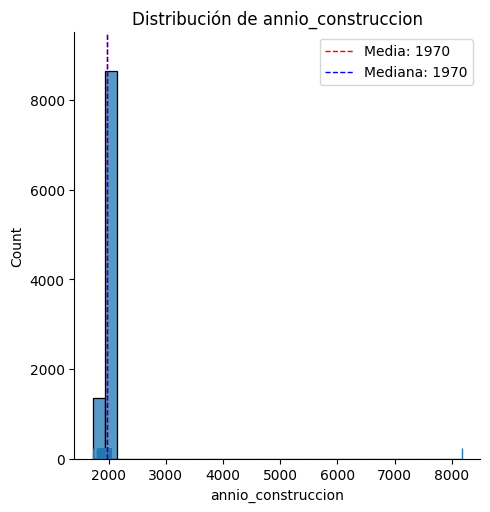

count    10000.0
mean      1970.0
std         69.0
min       1723.0
25%       1957.0
50%       1970.0
75%       1994.0
max       8170.0
Name: annio_construccion, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: precio_compra



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


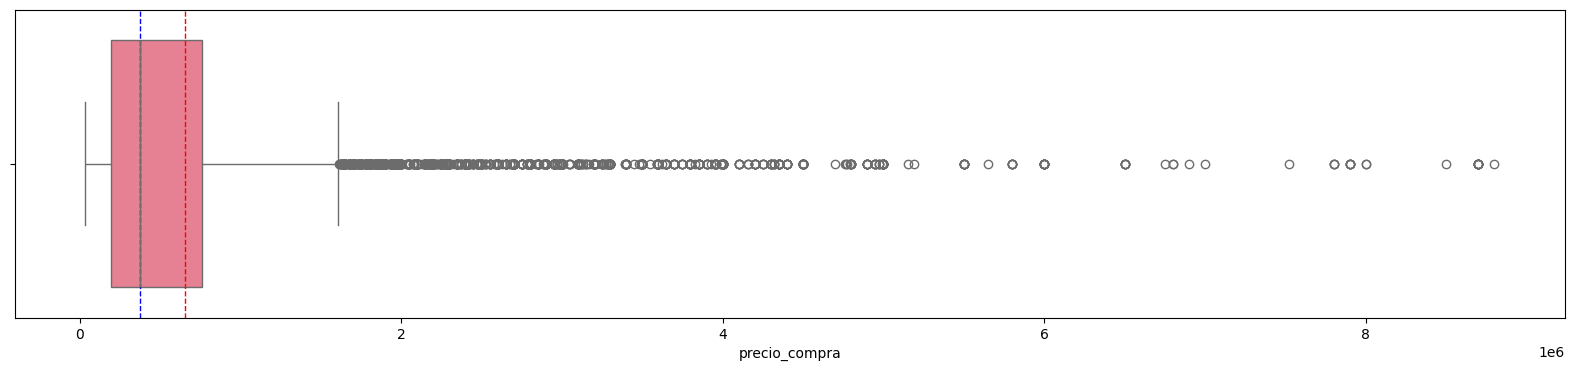

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


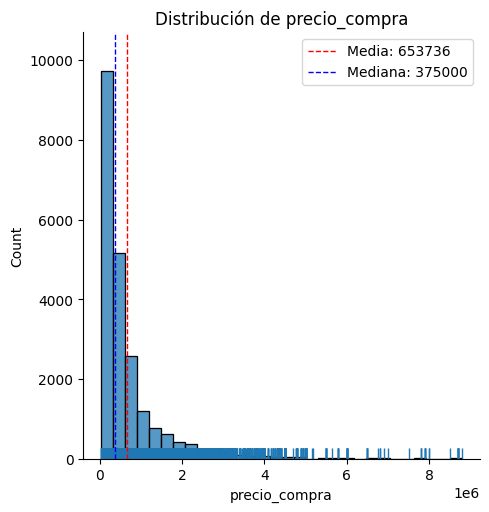

count      21742.0
mean      653736.0
std       782082.0
min        36000.0
25%       198000.0
50%       375000.0
75%       763600.0
max      8800000.0
Name: precio_compra, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: precio_compra_por_m2



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


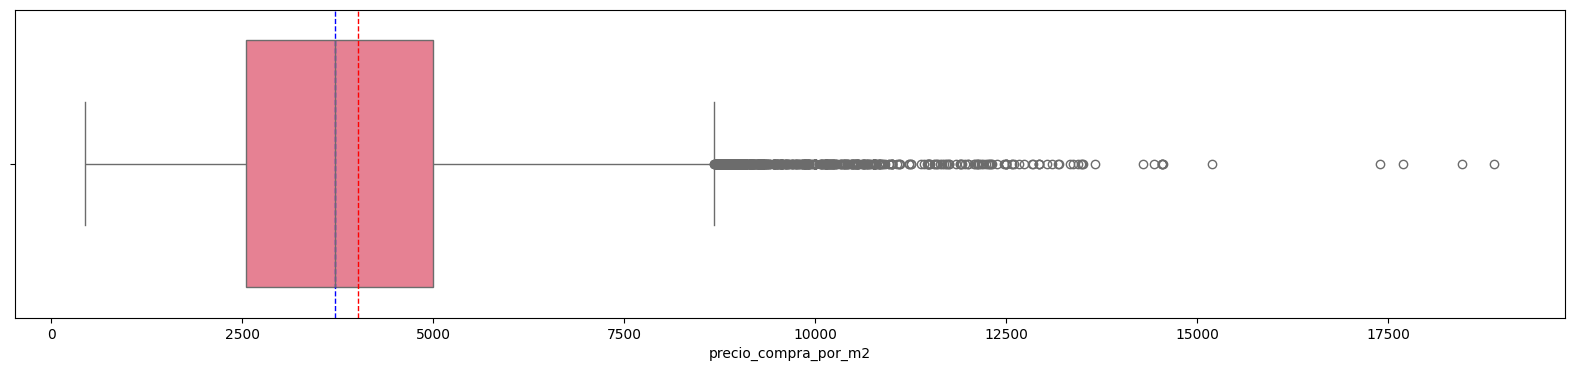

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


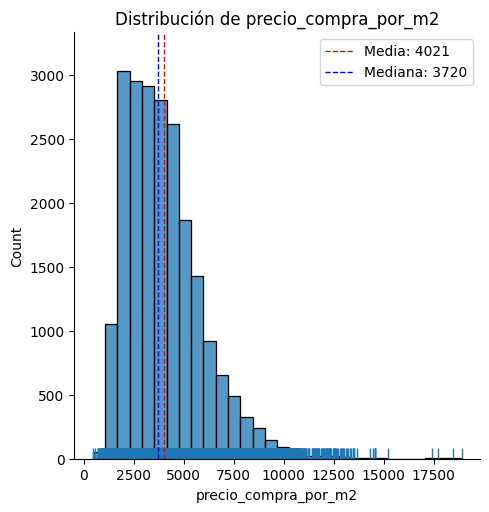

count    21742.0
mean      4021.0
std       1908.0
min        447.0
25%       2551.0
50%       3720.0
75%       5000.0
max      18889.0
Name: precio_compra_por_m2, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: bannos



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


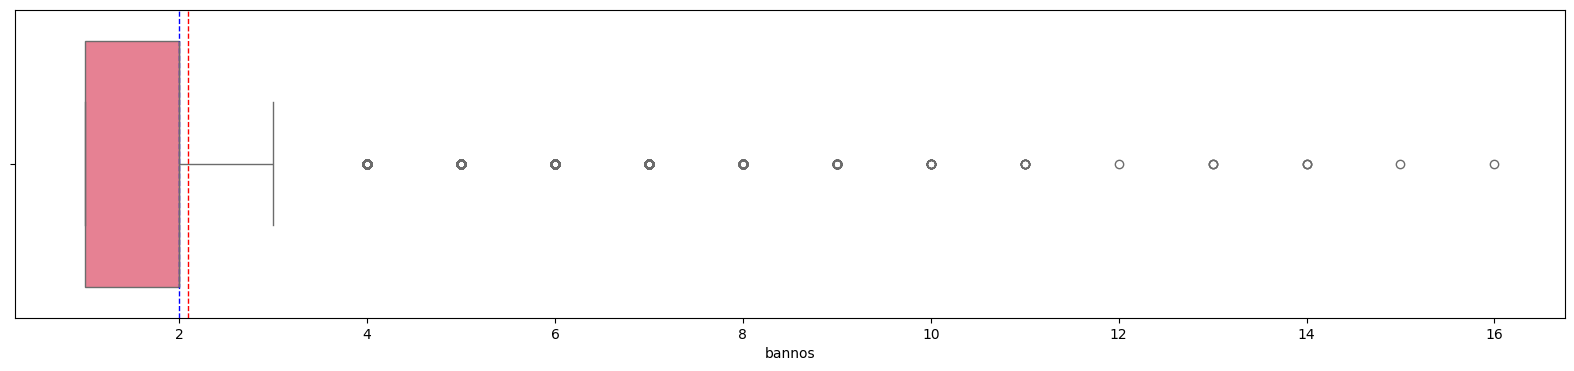

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


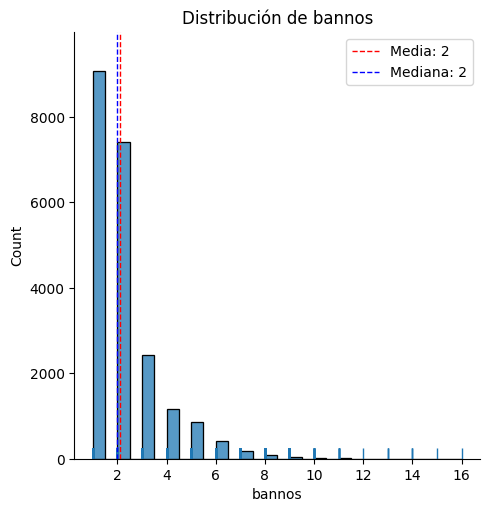

count    21726.0
mean         2.0
std          1.0
min          1.0
25%          1.0
50%          2.0
75%          2.0
max         16.0
Name: bannos, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: habitaciones



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


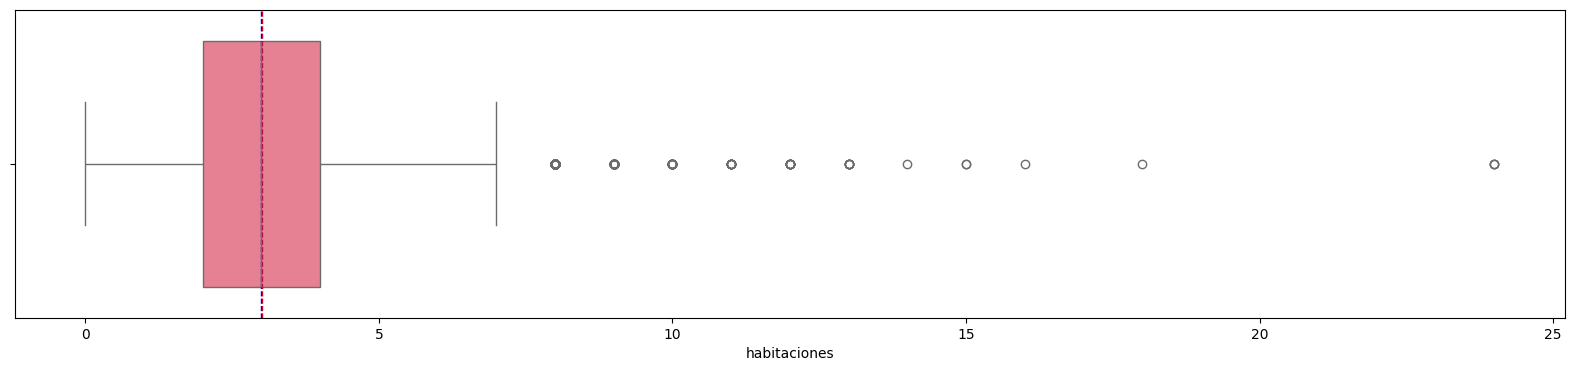

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


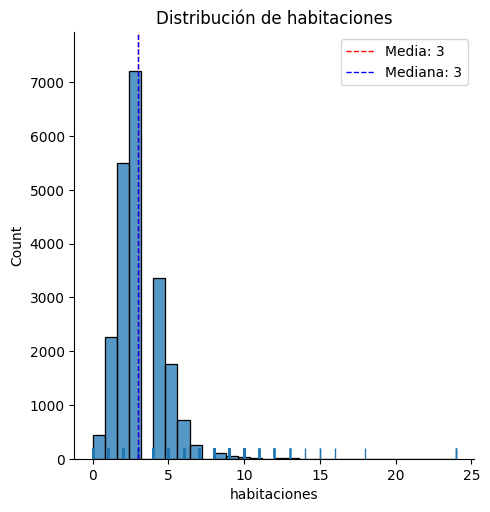

count    21742.0
mean         3.0
std          2.0
min          0.0
25%          2.0
50%          3.0
75%          4.0
max         24.0
Name: habitaciones, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: metros_cuadrados



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


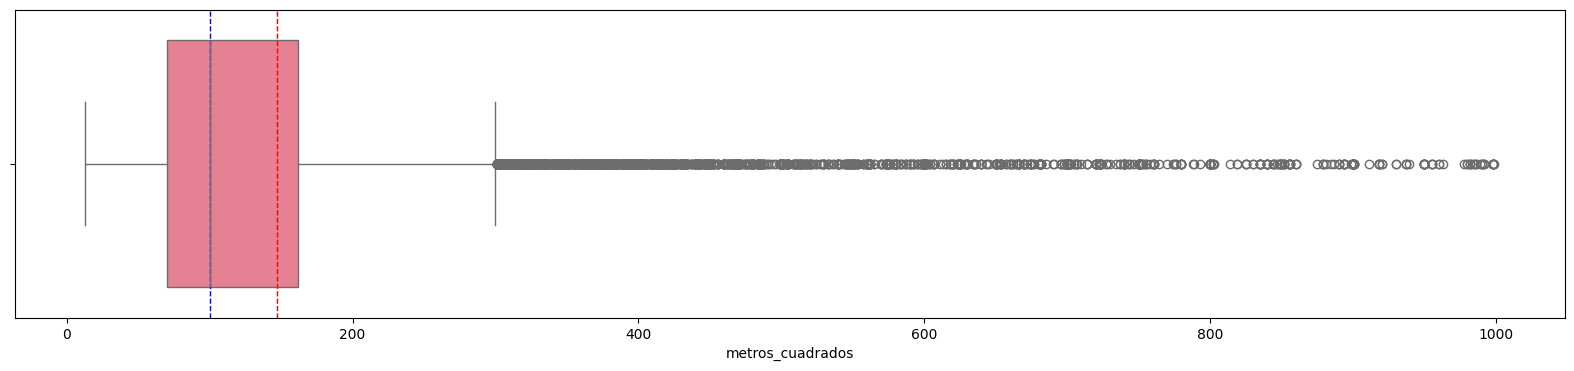

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\745358095.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


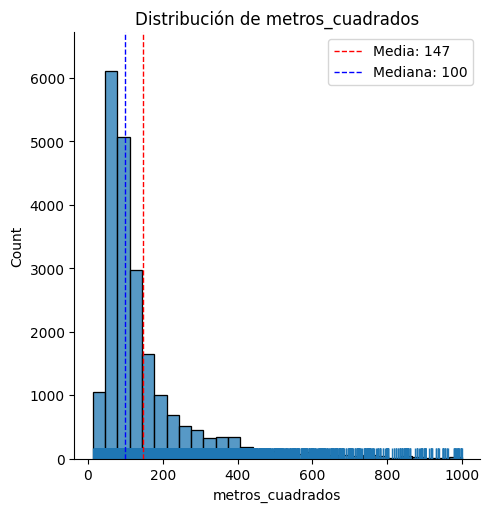

count    21616.0
mean       147.0
std        134.0
min         13.0
25%         70.0
50%        100.0
75%        162.0
max        999.0
Name: metros_cuadrados, dtype: float64
------------------------------------------------------------


In [103]:
graficos_variables_cuant(df_cuant)

##### Variables Cualitativas

In [104]:
df_cual = df.select_dtypes(exclude= 'number')

In [105]:
def graficos_variables_cualit(data):
    ''''Funcuion para graficar las variables cualitativas'''
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(df[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
                ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)
                #se superponen los valores porque me da uns advertencia al aplicar este parametro, no sé como sacarla :)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: cee



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


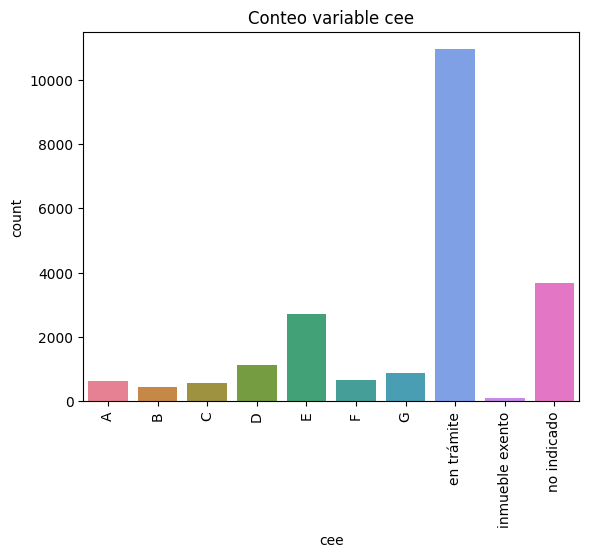

cee
en trámite         10937
no indicado         3669
E                   2701
D                   1121
G                    894
F                    674
A                    618
C                    580
B                    452
inmueble exento       96
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: piso



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


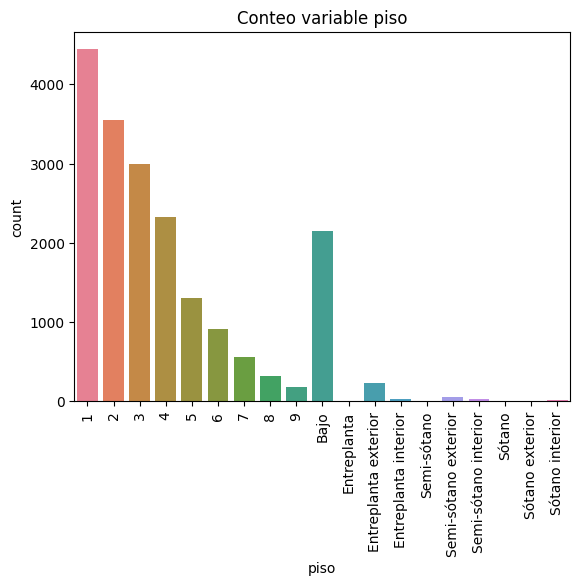

piso
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: balcon

No es necesario graficar porque tiene un solo valor dentro de la columna
balcon
True    3321
Name: count, dtype: int64
-------------------------------------------------------------------------------

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


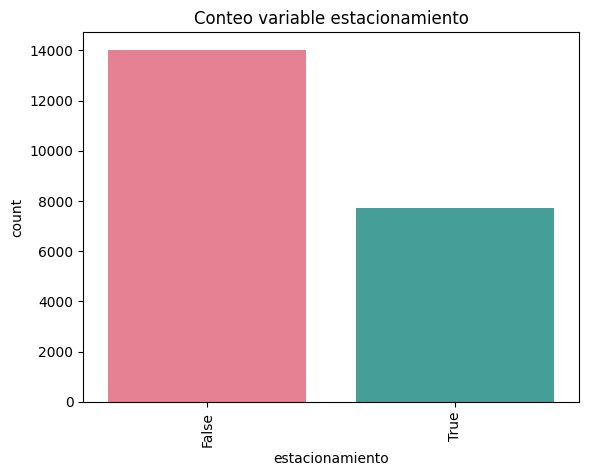

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')


estacionamiento
False    14023
True      7719
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: pileta

No es necesario graficar porque tiene un solo valor dentro de la columna
pileta
True    5171
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: trastero

No es necesario graficar porque tiene un solo valor dentro de la columna
trastero
True    7698
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: terraza

No es necesario graficar 

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


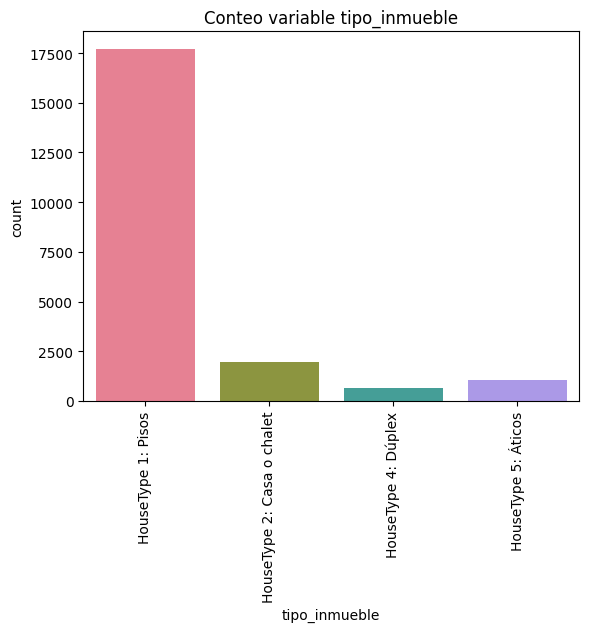

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')


tipo_inmueble
HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: accesible

No es necesario graficar porque tiene un solo valor dentro de la columna
accesible
True    4074
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: exterior



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


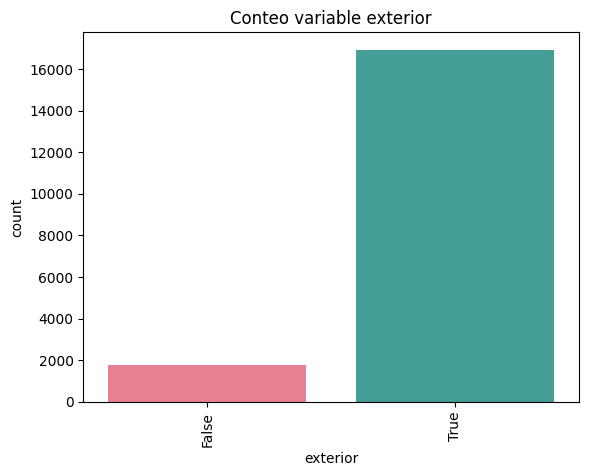

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')


exterior
True     16922
False     1777
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: bajo



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


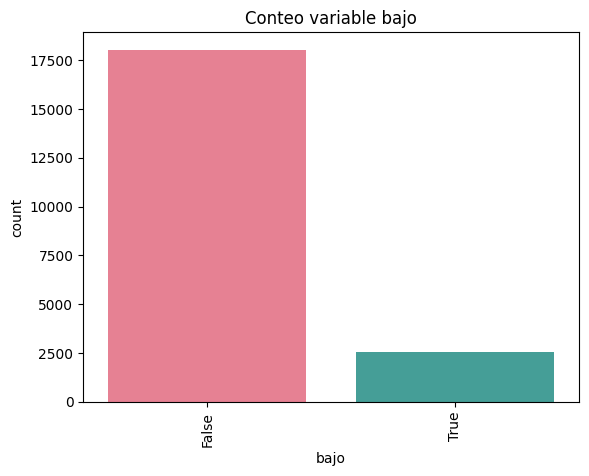

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


bajo
False    18033
True      2539
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: necesita_reforma



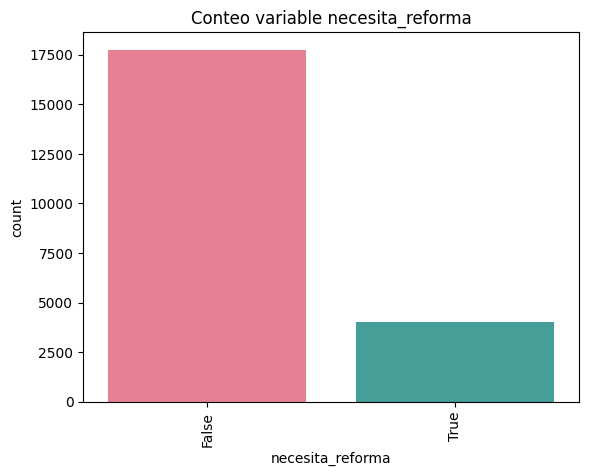

necesita_reforma
False    17747
True      3995
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: ubicacion



C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\3819651598.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


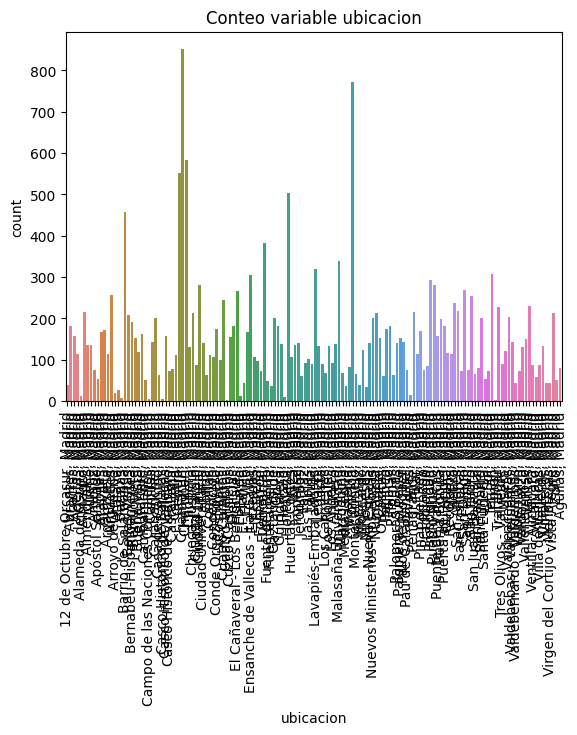

ubicacion
Chamartín, Madrid                           851
Moncloa, Madrid                             771
Chamberí, Madrid                            583
Centro, Madrid                              552
Hortaleza, Madrid                           503
                                           ... 
Barajas, Madrid                               7
Campo de las Naciones-Corralejos, Madrid      6
Casco Histórico de Barajas, Madrid            5
Timón, Madrid                                 4
Cuatro Vientos, Madrid                        2
Name: count, Length: 146, dtype: int64
----------------------------------------------------------------------------------------------------


In [106]:
graficos_variables_cualit(df_cual)

## Limpieza de datos

In [107]:
def rellenar_columnas_F(data):
    ''' Función que rellena las columnas que tienen valor true y nan'''
    try:
        df['zonas_verdes'].replace(np.nan, False,inplace=True)
        df['balcon'].replace(np.nan, False,inplace=True)
        df['armarios_empotrados'].replace(np.nan, False,inplace=True)
        df['jardin'].replace(np.nan, False,inplace=True)
        df['pileta'].replace(np.nan, False,inplace=True)
        df['trastero'].replace(np.nan, False,inplace=True)
        df['terraza'].replace(np.nan, False,inplace=True)
        df['accesible'].replace(np.nan, False,inplace=True)
    except Exception as a:
        print(f"No pude rellenar las columnas por {a}")
    return data

In [108]:
df = rellenar_columnas_F(df)

In [109]:
def rellenar_annios_nulos_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_antiguos = df[(df['necesita_reforma'] == True) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que necesitan reforma
        dicc_annios_antiguos = dicc_annios_antiguos + [{'ubicacion': 'Horcajo, Madrid', 'annio_construccion': 1957}, 
                   {'ubicacion': 'Valdebebas - Valdefuentes, Madrid', 'annio_construccion': 1957},
                   {'ubicacion': 'Virgen del Cortijo - Manoteras, Madrid', 'annio_construccion': 1957}]
        
        df_annios_antiguos = pd.DataFrame(dicc_annios_antiguos)
        df_unido = pd.merge(df,df_annios_antiguos, on='ubicacion', how = 'left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido['annio_construccion'] = df_unido.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == True) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido.drop(columns=['annio_construccion_y', 'annio_construccion_x'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df


In [110]:
def rellenar_annios_nulos_no_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_nuevo = df[(df['necesita_reforma'] == False) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que no necesitan reforma
        dicc_annios_nuevo = dicc_annios_nuevo + [{'ubicacion': 'Cuatro Vientos, Madrid', 'annio_construccion': 1973}]
        
        df_annios_nuevo = pd.DataFrame(dicc_annios_nuevo)
        df_unido_nuevo = pd.merge(df,df_annios_nuevo, on='ubicacion', how='left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido_nuevo['annio_construccion'] = df_unido_nuevo.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == False) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido_nuevo.drop(columns=['annio_construccion_x', 'annio_construccion_y'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df

In [111]:
media_año_barrio_s = df[(df['ubicacion'] == 'Barrio de Salamanca, Madrid') & (df['annio_construccion'].notna())].groupby('ubicacion')['annio_construccion'].mean(numeric_only = True).astype(int)
media_año_barrio_s

ubicacion
Barrio de Salamanca, Madrid    1979
Name: annio_construccion, dtype: int32

In [112]:
df['annio_construccion'].replace(8170.0, 1979, inplace= True)

In [113]:
def rellenar_pisos_nulos(df):
    '''Funcion para rellenar los valores nulos de los pisos, con la moda segun la ubicacion'''
    try:
        #df el piso que más se repite, respetando las alturas por ubicacion segun normativa
        df_piso_más_comun = df[df['piso'].notna()].groupby(['ubicacion', 'piso'], as_index=False).count()[['ubicacion', 'piso']].groupby('ubicacion', as_index=False).max()

        df_unido_pisos = pd.merge(df,df_piso_más_comun, on='ubicacion', how= 'inner')

        df_unido_pisos['piso'] = df_unido_pisos.apply(lambda x: x.piso_y if pd.isna(x.piso_x) else x.piso_x, axis = 1)

        df = df_unido_pisos.drop(columns=['piso_x', 'piso_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return df

In [114]:
def rellenar_bajos_nulos(df):
    '''Funcion que rellena los valores nulos en la columna bajo en base al piso en el que se encuentra'''
    try:
        bajos = ('Semi-sótano', 'Entreplanta interior', 'Entreplanta', 'Semi-sótano exterior', 'Semi-sótano interior', 'Sótano interior', 'Sótano', 'Sótano exterior')

        df['bajo'] = df['piso'].apply(lambda x: True if x in bajos else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [115]:
def sacar_metros_cuadrados_nuevos(df):
    ''''Funcion para rellenar los valores nulos de los metros cuadrados en base a el precio por metro cuadrado'''
    try:
        df.drop(columns=['metros_cuadrados'], axis= 1, inplace=True)
        df['metros_cuadrados'] = (df['precio_compra'] / df['precio_compra_por_m2']).round()
    except Exception as a:
        print(f"No pude tranformar el dataframe")
    return df
    

In [116]:
def rellenar_exterior(df):
    '''Funcion que rellena los valores nulos en la columna exterior en base a el piso en el que se encuentra'''
    try:
        exteriores = ('Entreplanta exterior', 'Semi-sótano exterior', 'Sótano exterior')

        df['exterior'] = df['piso'].apply(lambda x: True if x in exteriores else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [117]:
def rellenar_tipo_inmueble(df):
    '''Funcion que rellena los valores nulos en la columna tipo_inmueble, los unico no completos son los estudios'''
    try:
        df['tipo_inmueble'].fillna(value ='HouseType 1: Pisos', inplace=True)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [118]:
def rellenar_bannos_nulos(df):
    '''Funcion para rellenar los valores nulos de los bannos, con la media segun los metros cuadrados'''
    try:
        dicc_bannos = df[df['bannos'].notna()].groupby(['metros_cuadrados'], as_index=False)[['bannos']].mean().round().to_dict('records')
        dicc_bannos.append({'metros_cuadrados': 661, 'bannos': 5})

        df_banno_mas_comun = pd.DataFrame(dicc_bannos)

        df_unido_bannos = pd.merge(df,df_banno_mas_comun, on='metros_cuadrados', how= 'inner')

        df_unido_bannos['bannos'] = df_unido_bannos.apply(lambda x: x.bannos_y if pd.isna(x.bannos_x) else x.bannos_x, axis = 1)

        df = df_unido_bannos.drop(columns=['bannos_x', 'bannos_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return df

In [119]:
df = rellenar_annios_nulos_necesitan_reforma(df)
df = rellenar_annios_nulos_no_necesitan_reforma(df)

In [120]:
df = rellenar_pisos_nulos(df)

In [121]:
df = rellenar_bajos_nulos(df)

In [122]:
df = sacar_metros_cuadrados_nuevos(df)

In [123]:
df = rellenar_exterior(df)

In [124]:
df = rellenar_tipo_inmueble(df)

In [125]:
df = rellenar_bannos_nulos(df)

In [126]:
for i in df:
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f} %")

La cardinalidad de la variable precio_compra es 11.05 %
La cardinalidad de la variable precio_compra_por_m2 es 25.95 %
La cardinalidad de la variable cee es 0.05 %
La cardinalidad de la variable balcon es 0.01 %
La cardinalidad de la variable armarios_empotrados es 0.01 %
La cardinalidad de la variable jardin es 0.01 %
La cardinalidad de la variable zonas_verdes es 0.01 %
La cardinalidad de la variable estacionamiento es 0.01 %
La cardinalidad de la variable pileta es 0.01 %
La cardinalidad de la variable trastero es 0.01 %
La cardinalidad de la variable terraza es 0.01 %
La cardinalidad de la variable tipo_inmueble es 0.02 %
La cardinalidad de la variable accesible es 0.01 %
La cardinalidad de la variable exterior es 0.01 %
La cardinalidad de la variable bajo es 0.01 %
La cardinalidad de la variable necesita_reforma es 0.01 %
La cardinalidad de la variable habitaciones es 0.09 %
La cardinalidad de la variable ubicacion es 0.67 %
La cardinalidad de la variable annio_construccion es 0.7

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio_compra         21742 non-null  int64  
 1   precio_compra_por_m2  21742 non-null  int64  
 2   cee                   21742 non-null  object 
 3   balcon                21742 non-null  bool   
 4   armarios_empotrados   21742 non-null  bool   
 5   jardin                21742 non-null  bool   
 6   zonas_verdes          21742 non-null  bool   
 7   estacionamiento       21742 non-null  bool   
 8   pileta                21742 non-null  bool   
 9   trastero              21742 non-null  bool   
 10  terraza               21742 non-null  bool   
 11  tipo_inmueble         21742 non-null  object 
 12  accesible             21742 non-null  bool   
 13  exterior              21742 non-null  bool   
 14  bajo                  21742 non-null  bool   
 15  necesita_reforma   

In [128]:
df_correlacion = df.select_dtypes(include= 'number').corr()

In [129]:
df_correlacion

,precio_compra,precio_compra_por_m2,habitaciones,annio_construccion,metros_cuadrados,bannos
precio_compra,1.000000,0.519645,0.608893,-0.035410,0.804609,0.771973
precio_compra_por_m2,0.519645,1.000000,0.031707,-0.312602,0.112110,0.238746
habitaciones,0.608893,0.031707,1.000000,0.047424,0.695939,0.727268
annio_construccion,-0.035410,-0.312602,0.047424,1.000000,0.112610,0.122715
metros_cuadrados,0.804609,0.112110,0.695939,0.112610,1.000000,0.837052
bannos,0.771973,0.238746,0.727268,0.122715,0.837052,1.000000


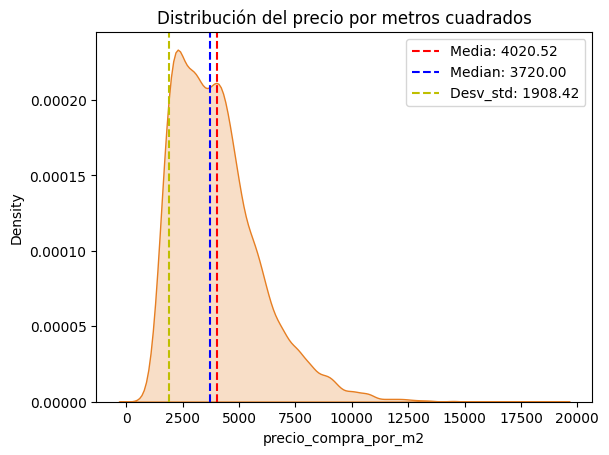

kurtosis: 2.15
simetria: 1.17
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


In [130]:
from scipy.stats import kurtosis, skew

media = df['precio_compra_por_m2'].mean()
median = df['precio_compra_por_m2'].median()
variance = df['precio_compra_por_m2'].var()
desv_std = df['precio_compra_por_m2'].std()  
kurtosis_valor = kurtosis(df['precio_compra_por_m2'])
simetria_valor = skew(df['precio_compra_por_m2'])

sns.kdeplot(data=df, x='precio_compra_por_m2',fill=True,color=color_g,)
# Agregar líneas verticales para las estadísticas
plt.axvline(media, color=media_color, linestyle='dashed', label=f'Media: {media:.2f}')
plt.axvline(median, color= mediana_color, linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(desv_std, color='y', linestyle='dashed', label=f'Desv_std: {desv_std:.2f}')

plt.title('Distribución del precio por metros cuadrados')
# plt.xlabel('Popularidad')
# plt.ylabel('Densidad')

plt.legend()

plt.show()
# Interpretación de los valores

print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 0:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 0:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor < 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor > 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")

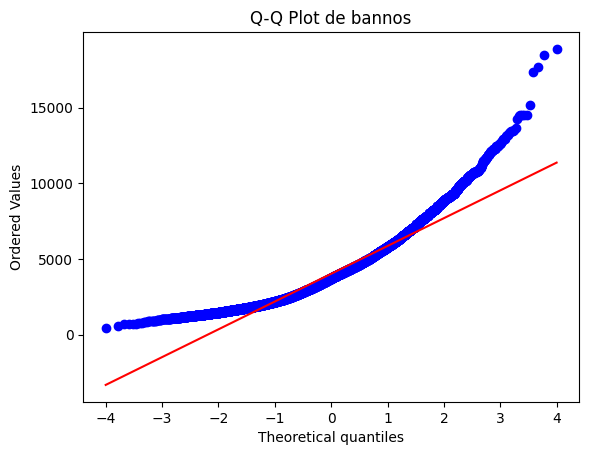

In [131]:
from scipy.stats import probplot
probplot(df['precio_compra_por_m2'], dist="norm", plot=plt)
plt.title(f'Q-Q Plot de {i}')
plt.show()

In [132]:
df_cuant_pair_plot = df.select_dtypes(include = 'number').drop(columns=['annio_construccion'], axis=1)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

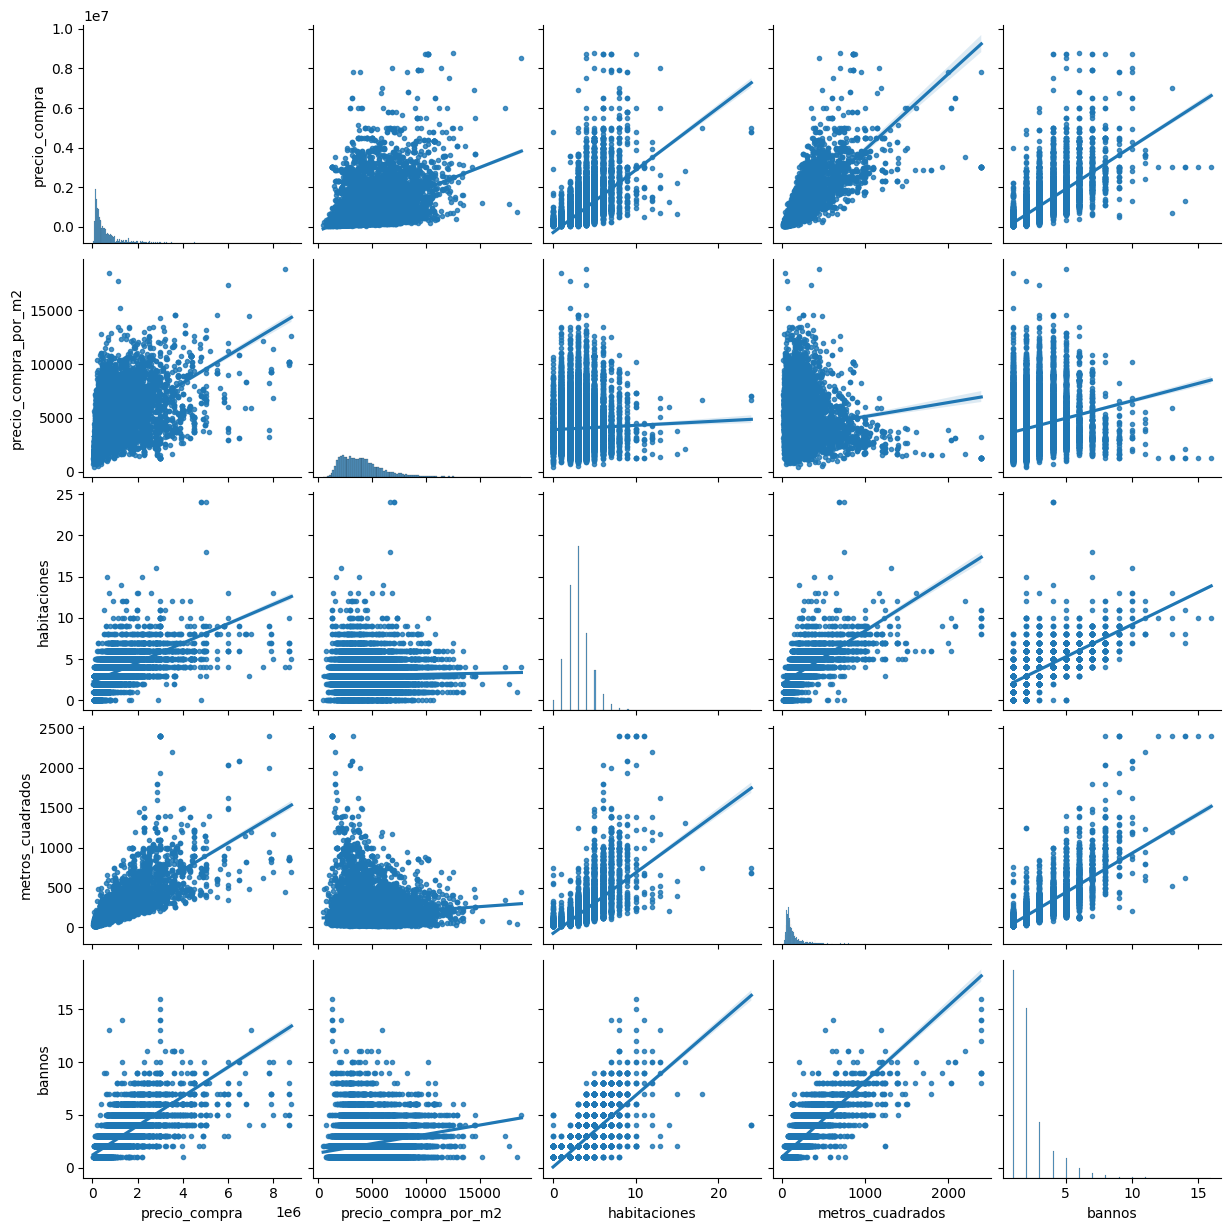

In [133]:
sns.pairplot(df_cuant_pair_plot, kind='reg', palette='husl', markers='.');

Text(0.5, 1.0, 'Relación entre Precio y Número de Habitaciones')

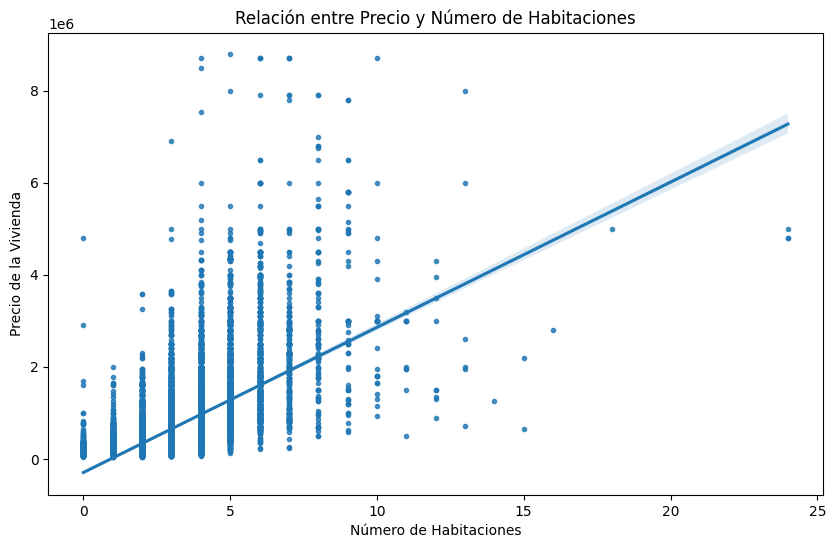

In [134]:
plt.figure(figsize=(10, 6))
sns.regplot(x='habitaciones', y='precio_compra', data=df, marker='.')

plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio de la Vivienda')
plt.title('Relación entre Precio y Número de Habitaciones')

In [135]:
df_precio_compra_cee = df.groupby('cee', as_index=False).mean(numeric_only = True)

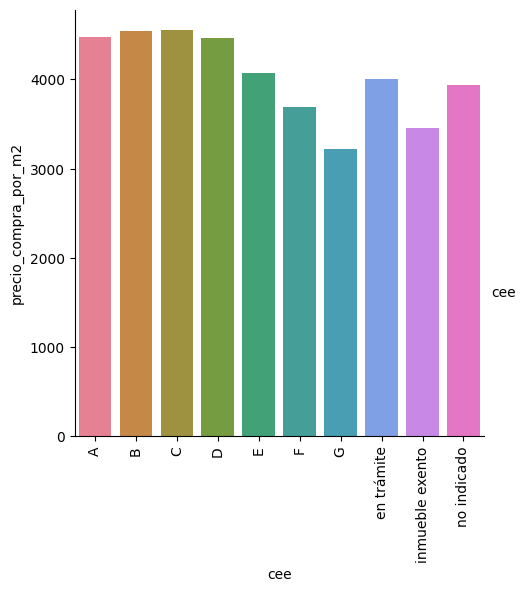

In [136]:
ax = sns.catplot(x = 'cee', y='precio_compra_por_m2', hue = 'cee', kind= 'bar',
            data=df_precio_compra_cee.sort_values(by='cee'), palette='husl');
ax.set_xticklabels(df_precio_compra_cee['cee'].sort_values().unique(), rotation=90)

In [137]:
# df_precio_compra_piso = df.groupby('piso', as_index=False, sort=True).mean(numeric_only = True)

In [138]:
# ax = sns.catplot(x='piso', y = 'precio_compra_por_m2', data = df_precio_compra_piso, kind='bar', hue = 'piso', palette='husl')
# ax.set_xticklabels(df_precio_compra_piso['piso'].sort_values().unique(), rotation=90)
                

# plt.xlabel('Piso')
# plt.title('Relación entre Piso y Precio de Compra por metros cuadrados')

# plt.show()


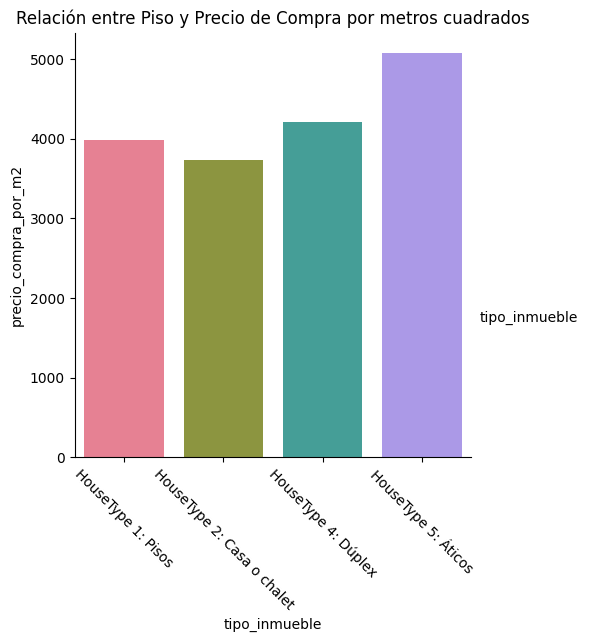

In [139]:
df_precio_compra_tipo_inmueble = df.groupby('tipo_inmueble', as_index=False, sort=True).mean(numeric_only = True)
ax = sns.catplot(x= 'tipo_inmueble', y = 'precio_compra_por_m2', data = df_precio_compra_tipo_inmueble, kind='bar', hue = 'tipo_inmueble', palette='husl')
ax.set_xticklabels(df_precio_compra_tipo_inmueble['tipo_inmueble'].sort_values().unique(), rotation = -45)
                

# plt.xlabel('Piso')
plt.title('Relación entre Piso y Precio de Compra por metros cuadrados')

plt.show()

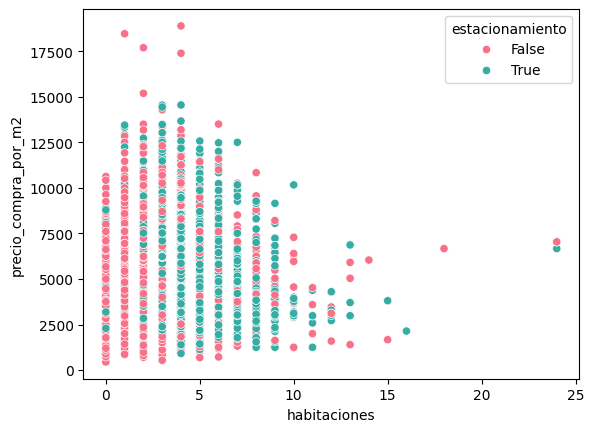

In [140]:
ax = sns.scatterplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'estacionamiento', palette='husl')


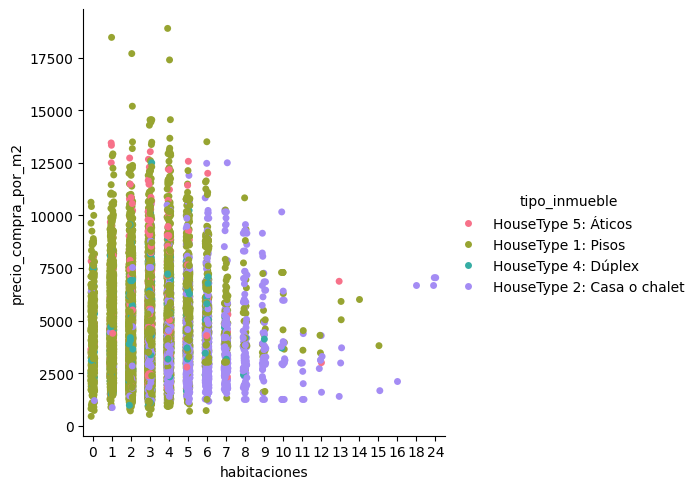

In [141]:
sns.catplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'tipo_inmueble', palette='husl')

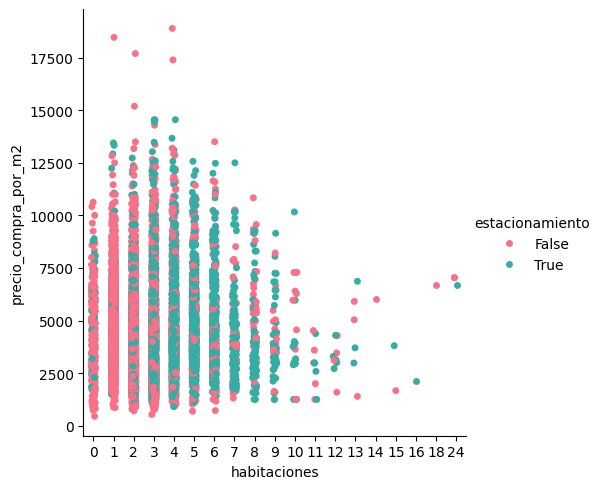

In [142]:
sns.catplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'estacionamiento', palette='husl')

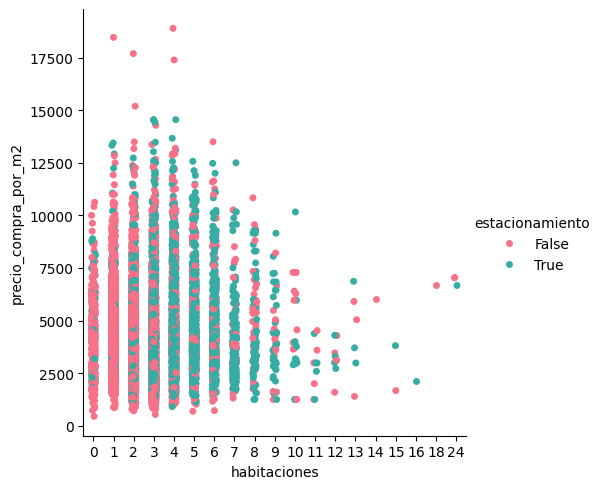

In [143]:
ax = sns.catplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'estacionamiento', palette='husl')

In [146]:
sur = ['Usera, Madrid', 'Puente de Vallecas, Madrid', 'Carabanchel, Madrid', 'Villaverde, Madrid', 'Puerta Bonita, Madrid', 'Vista Alegre, Madrid', 'San Fermín, Madrid', 'Pradolongo, Madrid', '12 de Octubre-Orcasur, Madrid', 'Almendrales, Madrid', 'Moscardó, Madrid', 'Zofío, Madrid', 'Los Ángeles, Madrid', 'San Cristóbal, Madrid']
este = ['Vicálvaro, Madrid', 'Casco Histórico de Vallecas, Madrid', 'Ensanche de Vallecas - La Gavia, Madrid', 'Santa Eugenia, Madrid', 'Orcasitas, Madrid', 'San Diego, Madrid', 'Valdebernardo - Valderribas, Madrid', 'Valdezarza, Madrid', 'Barajas, Madrid', 'Arapiles, Madrid', 'San Juan Bautista, Madrid', 'Prosperidad, Madrid', 'Ciudad Lineal, Madrid', 'Costillares, Madrid', 'Pueblo Nuevo, Madrid', 'Quintana, Madrid']
centro = ['Retiro, Madrid', 'Arganzuela, Madrid', 'Chamberí, Madrid', 'Centro, Madrid', 'Malasaña-Universidad, Madrid', 'Palacio, Madrid', 'Sol, Madrid', 'Chueca-Justicia, Madrid', 'Huertas-Cortes, Madrid', 'La Paz, Madrid', 'Recoletos, Madrid', 'Jerónimos, Madrid', 'Atalaya, Madrid', 'Niño Jesús, Madrid', 'Fuentelarreina, Madrid', 'Alameda de Osuna, Madrid', 'Media Legua, Madrid']
oeste = ['Moncloa, Madrid', 'Chamartín, Madrid', 'Tetuán, Madrid', 'Argüelles, Madrid', 'Valdemarín, Madrid', 'Ciudad Universitaria, Madrid', 'Nuevos Ministerios-Ríos Rosas, Madrid', 'Aravaca, Madrid', 'Vallehermoso, Madrid', 'Cuatro Caminos, Madrid', 'Ventilla-Almenara, Madrid', 'Sanchinarro, Madrid', 'El Viso, Madrid', 'Ciudad Jardín, Madrid', 'Chopera, Madrid', 'Valdemarín, Madrid', 'Virgen del Cortijo - Manoteras, Madrid']
norte = ['Fuencarral, Madrid', 'Peñagrande, Madrid', 'Pilar, Madrid', 'Pinar del Rey, Madrid', 'Canillas, Madrid', 'Tres Olivos - Valverde, Madrid', 'Conde Orgaz-Piovera, Madrid', 'Hortaleza, Madrid', 'Apóstol Santiago, Madrid', 'Nuevos Ministerios-Ríos Rosas, Madrid', 'Arapiles, Madrid', 'Bernabéu-Hispanoamérica, Madrid', 'Prosperidad, Madrid', 'Castilla, Madrid', 'Fuente del Berro, Madrid', 'Media Legua, Madrid']

In [147]:
funcion_lambda = lambda x: 'sur' if x in sur else ('este' if x in este else ('centro' if x in centro else ('oeste' if x in oeste else 'norte')))
df['zona'] = df['ubicacion'].apply(funcion_lambda)

In [148]:
df_zonas = df.groupby('zona', as_index=False).mean(numeric_only=True)

In [149]:
df_zonas

,zona,precio_compra,precio_compra_por_m2,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,accesible,exterior,bajo,necesita_reforma,habitaciones,annio_construccion,metros_cuadrados,bannos
0,centro,9.281269e+05,5674.661222,0.301491,0.640980,0.004972,0.085227,0.222301,0.088423,0.274503,0.253196,0.146662,0.020952,0.028409,0.214844,3.007812,1937.863281,157.435014,2.276634
1,este,3.406395e+05,3226.678945,0.102553,0.622018,0.014232,0.253244,0.359565,0.264964,0.346589,0.426120,0.194642,0.030557,0.031812,0.145668,2.596065,1979.232733,102.425283,1.611972
2,norte,5.641843e+05,3799.439156,0.148091,0.611639,0.073269,0.198155,0.353188,0.252238,0.354376,0.461356,0.208569,0.059748,0.036452,0.172574,2.910470,1973.866709,140.329892,1.965832
3,oeste,1.109373e+06,4774.032673,0.117571,0.663236,0.180345,0.208644,0.527914,0.343710,0.475174,0.500386,0.180859,0.201183,0.202984,0.229483,3.681760,1976.307692,251.354515,2.948546
4,sur,1.751360e+05,2101.245305,0.087441,0.490023,0.002934,0.136150,0.185446,0.112676,0.217723,0.482394,0.123239,0.052230,0.034624,0.153169,2.646714,1974.210681,84.252934,1.318075


Text(0.5, 1.0, 'Relación entre las zonas y Precio de Compra por metros cuadrados')

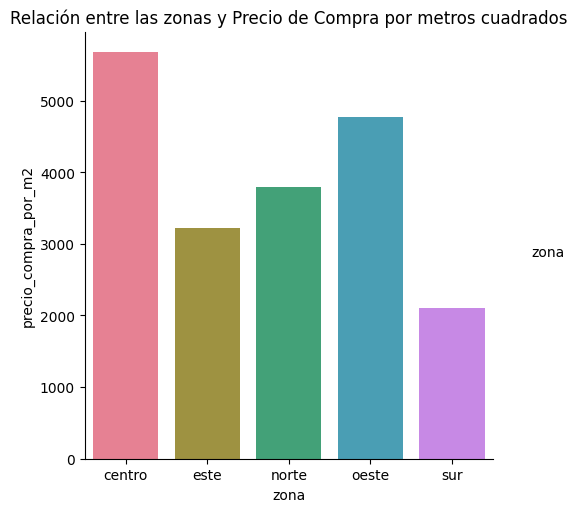

In [150]:
ax = sns.catplot(x = 'zona', y='precio_compra_por_m2', hue = 'zona', kind= 'bar', palette='husl',
            data=df_zonas);
plt.title('Relación entre las zonas y Precio de Compra por metros cuadrados')

In [151]:
centro

['Retiro, Madrid',
 'Arganzuela, Madrid',
 'Chamberí, Madrid',
 'Centro, Madrid',
 'Malasaña-Universidad, Madrid',
 'Palacio, Madrid',
 'Sol, Madrid',
 'Chueca-Justicia, Madrid',
 'Huertas-Cortes, Madrid',
 'La Paz, Madrid',
 'Recoletos, Madrid',
 'Jerónimos, Madrid',
 'Atalaya, Madrid',
 'Niño Jesús, Madrid',
 'Fuentelarreina, Madrid',
 'Alameda de Osuna, Madrid',
 'Media Legua, Madrid']

In [152]:
df_centro = df[df['zona'] == 'centro']

In [153]:
df_centro.columns

Index(['precio_compra', 'precio_compra_por_m2', 'cee', 'balcon',
       'armarios_empotrados', 'jardin', 'zonas_verdes', 'estacionamiento',
       'pileta', 'trastero', 'terraza', 'tipo_inmueble', 'accesible',
       'exterior', 'bajo', 'necesita_reforma', 'habitaciones', 'ubicacion',
       'annio_construccion', 'piso', 'metros_cuadrados', 'bannos', 'zona'],
      dtype='object')

In [154]:
df_zonas

,zona,precio_compra,precio_compra_por_m2,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,accesible,exterior,bajo,necesita_reforma,habitaciones,annio_construccion,metros_cuadrados,bannos
0,centro,9.281269e+05,5674.661222,0.301491,0.640980,0.004972,0.085227,0.222301,0.088423,0.274503,0.253196,0.146662,0.020952,0.028409,0.214844,3.007812,1937.863281,157.435014,2.276634
1,este,3.406395e+05,3226.678945,0.102553,0.622018,0.014232,0.253244,0.359565,0.264964,0.346589,0.426120,0.194642,0.030557,0.031812,0.145668,2.596065,1979.232733,102.425283,1.611972
2,norte,5.641843e+05,3799.439156,0.148091,0.611639,0.073269,0.198155,0.353188,0.252238,0.354376,0.461356,0.208569,0.059748,0.036452,0.172574,2.910470,1973.866709,140.329892,1.965832
3,oeste,1.109373e+06,4774.032673,0.117571,0.663236,0.180345,0.208644,0.527914,0.343710,0.475174,0.500386,0.180859,0.201183,0.202984,0.229483,3.681760,1976.307692,251.354515,2.948546
4,sur,1.751360e+05,2101.245305,0.087441,0.490023,0.002934,0.136150,0.185446,0.112676,0.217723,0.482394,0.123239,0.052230,0.034624,0.153169,2.646714,1974.210681,84.252934,1.318075


C:\Users\ortiz\AppData\Local\Temp\ipykernel_19368\1957013947.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.catplot(x = 'zona', y='precio_compra_por_m2', hue = 'tipo_inmueble', kind= 'bar', palette='husl',


Text(0.5, 1.0, 'Relación entre tipo y € por m2 por Zonas')

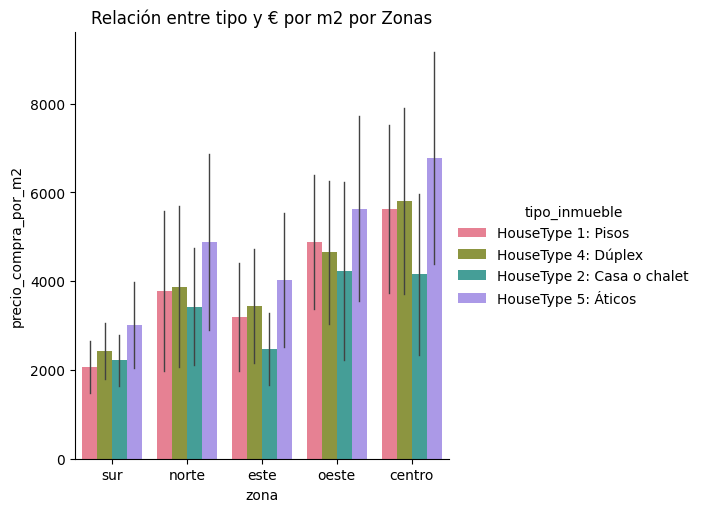

In [155]:
ax = sns.catplot(x = 'zona', y='precio_compra_por_m2', hue = 'tipo_inmueble', kind= 'bar', palette='husl',
            data=df, errorbar = 'sd', errwidth = 1);
# ax.set_xticklabels(df['zona'].sort_values().unique(), rotation = -45)
plt.title('Relación entre tipo y € por m2 por Zonas')

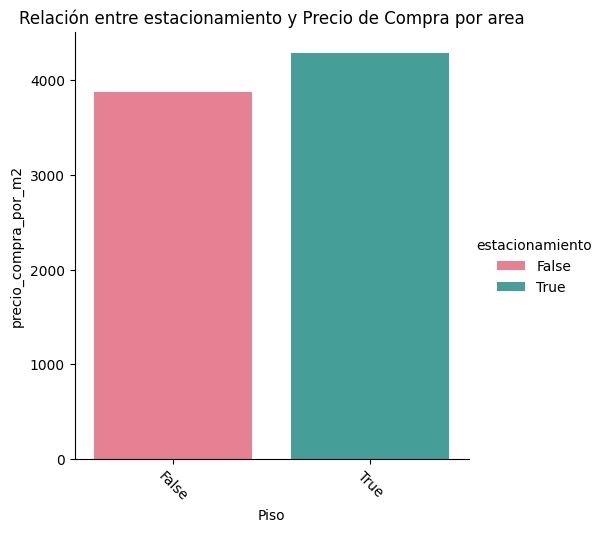

In [156]:
df_precio_compra_caract = df.groupby('estacionamiento', as_index=False, sort=True).mean(numeric_only = True)
ax = sns.catplot(x= 'estacionamiento', y = 'precio_compra_por_m2', data = df_precio_compra_caract, kind='bar', hue = 'estacionamiento', palette='husl')
ax.set_xticklabels(df_precio_compra_caract['estacionamiento'].sort_values().unique(), rotation = -45)
                

plt.xlabel('Piso')
plt.title('Relación entre estacionamiento y Precio de Compra por area')

plt.show()

In [157]:
# from geopy.geocoders import Nominatim
# import time

# def obtener_coordenadas(direccion):
#     geolocalizador = Nominatim(user_agent="maria")
#     ubicacion = geolocalizador.geocode(direccion)

#     if ubicacion:
#         latitud = ubicacion.latitude
#         longitud = ubicacion.longitude

#         return latitud, longitud
#     else:
#         print(f"No se encontraron coordenadas para la dirección proporcionada {direccion}.")
#         time.sleep(1)
#         latitud = input('Lat: ')
#         longitud = input('Long: ')
#         return latitud, longitud

# dicc = []
# for i in df['ubicacion'].unique():
#     coodenadas = obtener_coordenadas(i)
#     dicc.append({'ubicacion' : i, 
#                 'latitud' : coodenadas[0],
#                 'longitud' : coodenadas[1]})


# print(dicc)

In [158]:
# df_coordenadas = pd.DataFrame(dicc)

In [159]:
# df_coordenadas

In [160]:
# df_coordenadas.to_csv('df_coordenadas.csv')

In [161]:
df_coordenadas = pd.read_csv(r'C:\Users\ortiz\OneDrive\Documents\GitHub\DS_PT_09_2023\EDA\Madrid_real_state\df_coordenadas.csv', index_col='Unnamed: 0')

In [162]:
df_coordenadas

,ubicacion,latitud,longitud
0,"San Cristóbal, Madrid",40.343354,-3.687817
1,"Los Ángeles, Madrid",40.356222,-3.699639
2,"San Andrés, Madrid",40.345539,-3.710970
3,"Los Rosales, Madrid",40.357195,-3.689448
4,"Villaverde, Madrid",40.345610,-3.695956
...,...,...,...
141,"Alameda de Osuna, Madrid",40.457581,-3.587975
142,"Barajas, Madrid",40.473318,-3.579845
143,"Horcajo, Madrid",40.408186,-3.626776
144,"Campo de las Naciones-Corralejos, Madrid",40.153387,-3.705583


In [163]:
# df_coordenadas['latitud'] = df_coordenadas['latitud'].astype(float)
# df_coordenadas['longitud'] = df_coordenadas['longitud'].astype(float)

In [164]:
df_coordenadas.dtypes

ubicacion     object
latitud      float64
longitud     float64
dtype: object

In [165]:
df = pd.merge(df,df_coordenadas, on= 'ubicacion')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio_compra         21742 non-null  int64  
 1   precio_compra_por_m2  21742 non-null  int64  
 2   cee                   21742 non-null  object 
 3   balcon                21742 non-null  bool   
 4   armarios_empotrados   21742 non-null  bool   
 5   jardin                21742 non-null  bool   
 6   zonas_verdes          21742 non-null  bool   
 7   estacionamiento       21742 non-null  bool   
 8   pileta                21742 non-null  bool   
 9   trastero              21742 non-null  bool   
 10  terraza               21742 non-null  bool   
 11  tipo_inmueble         21742 non-null  object 
 12  accesible             21742 non-null  bool   
 13  exterior              21742 non-null  bool   
 14  bajo                  21742 non-null  bool   
 15  necesita_reforma   

In [167]:
df_todo_n = df.copy()

In [168]:
df_todo_n.replace(False, 0, inplace=True)
df_todo_n.replace(True, 1, inplace=True)

In [169]:
df_todo_n

,precio_compra,precio_compra_por_m2,cee,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,habitaciones,ubicacion,annio_construccion,piso,metros_cuadrados,bannos,zona,latitud,longitud
0,85000,1328,D,0,0,0,0,0,0,0,0,HouseType 1: Pisos,0,0,0,0,2,"San Cristóbal, Madrid",1960.0,3,64.0,1.0,sur,40.343354,-3.687817
1,72000,1125,F,0,0,0,0,0,0,0,1,HouseType 1: Pisos,0,0,0,0,3,"San Cristóbal, Madrid",1960.0,3,64.0,1.0,sur,40.343354,-3.687817
2,76000,1188,en trámite,0,0,0,0,0,0,0,0,HouseType 1: Pisos,0,0,0,1,3,"San Cristóbal, Madrid",1960.0,1,64.0,1.0,sur,40.343354,-3.687817
3,110000,1719,E,0,0,0,0,0,0,0,1,HouseType 1: Pisos,0,0,0,0,2,"San Cristóbal, Madrid",1968.0,2,64.0,1.0,sur,40.343354,-3.687817
4,94000,1446,en trámite,0,1,0,0,0,0,0,1,HouseType 1: Pisos,0,0,0,0,3,"San Cristóbal, Madrid",1968.0,1,65.0,1.0,sur,40.343354,-3.687817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,2294000,1535,G,0,0,0,0,0,0,0,0,HouseType 2: Casa o chalet,0,0,0,0,7,"El Plantío, Madrid",1995.0,2,1494.0,6.0,norte,40.468442,-3.817696
21738,1350000,2459,no indicado,0,1,1,0,0,1,1,1,HouseType 2: Casa o chalet,0,0,0,0,4,"El Plantío, Madrid",1995.0,2,549.0,3.0,norte,40.468442,-3.817696
21739,1400000,1847,E,0,0,0,0,1,0,0,0,HouseType 2: Casa o chalet,0,0,0,0,6,"El Plantío, Madrid",1995.0,2,758.0,9.0,norte,40.468442,-3.817696
21740,7000000,5882,en trámite,0,1,1,0,1,1,1,1,HouseType 2: Casa o chalet,0,0,0,0,8,"El Plantío, Madrid",1995.0,2,1190.0,13.0,norte,40.468442,-3.817696


In [170]:
df_todo_n.corr('pearson',numeric_only=True)

,precio_compra,precio_compra_por_m2,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,accesible,exterior,bajo,necesita_reforma,habitaciones,annio_construccion,metros_cuadrados,bannos,latitud,longitud
precio_compra,1.000000,0.519645,0.111260,0.107160,0.447871,-0.033806,0.330515,0.245192,0.262311,0.120923,-0.028822,0.281462,0.250835,0.044302,0.608893,-0.035410,0.804609,0.771973,0.054985,0.044686
precio_compra_por_m2,0.519645,1.000000,0.117304,0.119766,-0.033011,-0.013399,0.104458,0.039205,0.094452,-0.100564,0.019470,-0.046548,-0.008258,-0.036818,0.031707,-0.312602,0.112110,0.238746,0.084149,0.071751
balcon,0.111260,0.117304,1.000000,0.137072,0.048274,-0.026152,-0.009096,-0.045900,0.043888,0.011485,0.045776,-0.016431,-0.024615,0.008181,0.088361,-0.167059,0.072604,0.084780,0.011824,0.010608
armarios_empotrados,0.107160,0.119766,0.137072,1.000000,0.059104,0.180812,0.212277,0.117794,0.187674,0.100021,0.209976,-0.034991,-0.054906,-0.117472,0.081588,0.092377,0.088108,0.145836,0.029356,0.025396
jardin,0.447871,-0.033011,0.048274,0.059104,1.000000,-0.132978,0.276892,0.331471,0.158601,0.159160,-0.085765,0.523460,0.465945,-0.016544,0.457406,0.189293,0.624207,0.584420,0.024431,0.018177
zonas_verdes,-0.033806,-0.013399,-0.026152,0.180812,-0.132978,1.000000,0.361351,0.492217,0.276137,0.108325,0.205973,-0.101976,-0.102731,-0.095554,-0.008779,0.318746,-0.032351,0.029219,0.028794,0.026653
estacionamiento,0.330515,0.104458,-0.009096,0.212277,0.276892,0.361351,1.000000,0.532139,0.471914,0.187708,0.116168,0.133204,0.108715,-0.087692,0.291101,0.399684,0.354811,0.427130,0.005953,0.000056
pileta,0.245192,0.039205,-0.045900,0.117794,0.331471,0.492217,0.532139,1.000000,0.398736,0.170473,0.071443,0.155082,0.135564,-0.154298,0.196485,0.449623,0.326531,0.365189,0.016872,0.011688
trastero,0.262311,0.094452,0.043888,0.187674,0.158601,0.276137,0.471914,0.398736,1.000000,0.158022,0.080239,0.068985,0.068602,-0.065431,0.212015,0.279753,0.256264,0.312011,-0.004794,-0.009398
terraza,0.120923,-0.100564,0.011485,0.100021,0.159160,0.108325,0.187708,0.170473,0.158022,1.000000,0.051990,0.061937,0.059550,0.029577,0.219908,0.235642,0.172418,0.177267,-0.017610,-0.018885


<Axes: >

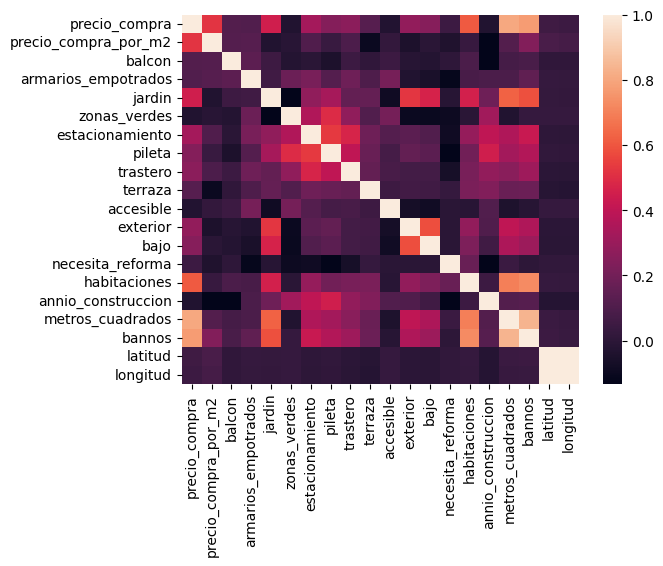

In [171]:
sns.heatmap(df_todo_n.corr(numeric_only=True), robust=True)

In [174]:
import geopandas as gpd

In [178]:
shapefile = r'C:\Users\ortiz\OneDrive\Documents\GitHub\DS_PT_09_2023\EDA\Map_Geopandas_Matplotlib\Europe\Europe.shp'
europa_gdf = gpd.read_file(shapefile)
europa_gdf.head()

,NAME,ORGN_NAME,geometry
0,Albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,België / Belgique,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."


In [179]:
europa_gdf = europa_gdf.drop('ORGN_NAME', axis = 1)
europa_gdf.head()

,NAME,geometry
0,Albania,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."


<Axes: >

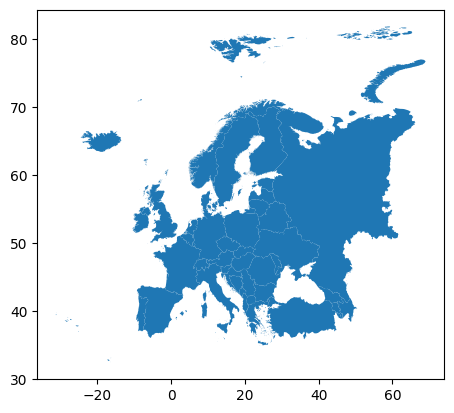

In [181]:
europa_gdf.plot()

In [191]:
import cartopy.crs as ccrs